### Predicting the Role of a Champion Based on Statistics Across an LEC Split Using ML Algorithms

In [6]:
#importing all libraries that will be needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

Data reading and initial cleaning

In [7]:
#Importing the dataset and doing initial cleaning
lec = pd.read_csv('LEC_2021_Summer_Champion_Stats.csv')

for x in lec.index:
    if lec.loc[x, 'GP'] == 0:
        lec.drop(x, inplace = True)

print(lec.tail())

lec.dtypes

     Champion      Pos  GP    P%     B%   P+B%    W%  CTR%  K  D  ...  GD10  \
112     Vayne      ADC   1  1.1%   0.0%   1.1%    0%  100%  4  2  ...  -732   
113  Volibear      Top   1  1.1%  17.8%  38.9%    0%  100%  2  4  ...   369   
114     Yasuo   Middle   1  1.1%   2.2%   3.3%    0%  100%  4  4  ...   826   
115       Zac   Jungle   1  1.1%   0.0%   1.1%  100%  100%  4  4  ...   618   
116    Zilean  Support   1  1.1%   0.0%   1.1%    0%  100%  1  2  ...   310   

    XPD10 CSD10 CSPM CS%P15  DPM   DMG%  GOLD%   WPM  WCPM  
112  -243    -7  9.4  28.5%  504  22.2%  23.2%  0.75  0.32  
113   181    16  8.9  25.3%  485  22.8%  23.1%  0.51   0.1  
114   453     9  7.5  25.0%  311  15.4%  22.1%  0.45  0.17  
115   420    -2  5.3  17.6%  536  17.2%  16.8%  0.95  0.34  
116   234   -11  0.6   2.6%  237  12.3%   9.8%  1.64  0.42  

[5 rows x 25 columns]


Champion    object
Pos         object
GP           int64
P%          object
B%          object
P+B%        object
W%          object
CTR%        object
K           object
D           object
A           object
KDA         object
KP          object
DTH%        object
FB%         object
GD10        object
XPD10       object
CSD10       object
CSPM        object
CS%P15      object
DPM         object
DMG%        object
GOLD%       object
WPM         object
WCPM        object
dtype: object

Data fitting

In [8]:
#Converting data to correct datatypes
lec['CSPM'] = lec['CSPM'].astype(str).astype(float)
lec['CS%P15'] = lec['CS%P15'].astype(str).str.rstrip('%').astype('float') / 100.0
lec['DPM'] = lec['DPM'].astype(str).astype(float)
lec['DMG%'] = lec['DMG%'].astype(str).str.rstrip('%').astype('float') / 100.0
lec['GOLD%'] = lec['GOLD%'].astype(str).str.rstrip('%').astype('float') / 100.0
lec['WPM'] = lec['WPM'].astype(str).astype(float)
lec['WCPM'] = lec['WCPM'].astype(str).astype(float)
lec['Pos'] = lec.Pos.astype('category')
lec['Pos'] = lec['Pos'].cat.codes
print(lec.head())
print(lec.dtypes)

   Champion  Pos  GP     P%     B%   P+B%   W% CTR%    K    D  ... GD10 XPD10  \
0  Tristana    0  34  37.8%  12.2%  50.0%  53%  50%  133   53  ...   30    -3   
1   Alistar    3  33  36.7%  12.2%  48.9%  58%  48%   19  118  ...  -62   -60   
2     Leona    3  31  34.4%  23.3%  57.8%  48%  23%   21  123  ...  -12   -26   
3    Lucian    2  27  30.0%  46.7%  78.9%  44%   7%  108   67  ...  152   123   
4    Rumble    1  26  28.9%  12.2%  41.1%  42%  31%   97   74  ...  264   254   

  CSD10 CSPM CS%P15    DPM   DMG%  GOLD%   WPM  WCPM  
0  -2.6  9.9  0.335  459.0  0.238  0.276  0.73  0.40  
1  -1.9  1.0  0.026  123.0  0.066  0.085  1.58  0.34  
2   2.1  1.1  0.026  121.0  0.061  0.083  1.55  0.42  
3   7.6  9.0  0.267  509.0  0.259  0.260  0.42  0.22  
4   7.7  6.3  0.177  467.0  0.239  0.196  0.47  0.23  

[5 rows x 25 columns]
Champion     object
Pos            int8
GP            int64
P%           object
B%           object
P+B%         object
W%           object
CTR%         object


Modelling and results

In [9]:
#Selecting data for modelling
lec = lec[['CSPM', 'CS%P15', 'DMG%', 'GOLD%', 'WPM', 'WCPM', 'Pos']]

X = lec[['CSPM','CS%P15','DMG%','GOLD%','WPM','WCPM']]
Y = lec['Pos']

In [10]:
#Splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [11]:
#Builing the first model - Gaussian Naive Bayes
model1 = GaussianNB()
model1.fit(X_train, Y_train)

GaussianNB()

In [12]:
#Model evaluation for just training data
score1 = model1.score(X_train, Y_train)
print(score1)

0.7241379310344828


In [13]:
#Model evaluation
pred1 = model1.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(Y_test, pred1)*100, 2)))
print("Confusion Matrix:")
print("{}".format(confusion_matrix(Y_test, pred1)))

Accuracy: 73.33%
Confusion Matrix:
[[2 0 0 0 0]
 [1 5 0 0 0]
 [1 0 6 0 1]
 [0 0 0 6 0]
 [0 1 4 0 3]]


In [14]:
#Builing the second model - Logistic Regression
model2 = LogisticRegression(solver='lbfgs', max_iter=1000)
model2.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [15]:
model2.predict(X_test[0:10])

array([4, 2, 1, 2, 1, 4, 4, 0, 2, 4], dtype=int8)

In [16]:
#Model evaluation for just training data
score2 = model2.score(X_train, Y_train)
print(score2)

0.735632183908046


In [17]:
#Model evaluation
pred2 = model2.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(Y_test, pred2)*100, 2)))
print("Confusion Matrix:")
print("{}".format(confusion_matrix(Y_test, pred2)))

Accuracy: 83.33%
Confusion Matrix:
[[2 0 0 0 0]
 [0 6 0 0 0]
 [1 0 4 0 3]
 [0 0 0 6 0]
 [0 0 1 0 7]]


In [18]:
#Builing the third model - Linear Discriminant Analysis
model3 = LinearDiscriminantAnalysis()
model3.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [19]:
#Model evaluation for just training data
score3 = model3.score(X_train, Y_train)
print(score3)

0.735632183908046


In [20]:
#Model evaluation
pred3 = model3.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(Y_test, pred3)*100, 2)))
print("Confusion Matrix:")
print("{}".format(confusion_matrix(Y_test, pred3)))

Accuracy: 80.0%
Confusion Matrix:
[[2 0 0 0 0]
 [0 6 0 0 0]
 [1 0 4 0 3]
 [0 0 0 6 0]
 [0 1 1 0 6]]


In [21]:
#Builing the fourth model - Random Forest Classifier
model4 = RandomForestClassifier(max_depth=6, random_state=0)
model4.fit(X_train, Y_train)

RandomForestClassifier(max_depth=6, random_state=0)

In [22]:
#Model evaluation for just training data
score4 = model4.score(X_train, Y_train)
print(score4)

0.9770114942528736


In [23]:
#Model evaluation
pred4 = model4.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(Y_test, pred4)*100, 2)))
print("Confusion Matrix:")
print("{}".format(confusion_matrix(Y_test, pred4)))

Accuracy: 83.33%
Confusion Matrix:
[[2 0 0 0 0]
 [0 4 0 0 2]
 [1 0 5 0 2]
 [0 0 0 6 0]
 [0 0 0 0 8]]


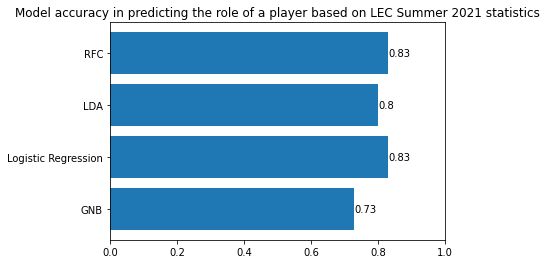

In [66]:
#showcasing results
final_score1 = model1.score(X_test, Y_test)
final_score2 = model2.score(X_test, Y_test)
final_score3 = model3.score(X_test, Y_test)
final_score4 = model4.score(X_test, Y_test)
final_score1 = round(final_score1,2)
final_score2 = round(final_score2,2)
final_score3 = round(final_score3,2)
final_score4 = round(final_score4,2)

x = np.array(['GNB', 'Logistic Regression', 'LDA', 'RFC'])
y = np.array([final_score1,final_score2,final_score3,final_score4])

ind = np.arange(len(y))

fig, ax = plt.subplots()
ax.set_title('Model accuracy in predicting the role of a player based on LEC Summer 2021 statistics')
ax.set_xlim([0,1])
ax.barh(ind, y)
ax.set_yticks(ind)
ax.set_yticklabels(x)
ax.bar_label(ax.containers[0])
plt.show()